In [245]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [246]:
#importing dataset
df=pd.read_csv("/content/train - train (2).csv")
df


,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
1,1,201-37,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...
31522,35022,2017,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,35032,2017,2.0,27.0,16.0,75.0,15.9,1014,0.0,SW,2.9
31524,35035,2017,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,35042,2017,2.0,28.0,2.0,9.0,8.6,1016,0.0,NNE,0.9


In [247]:
#missing values
print(df.isnull().sum())

Unnamed: 0         0
year              15
month              6
day               20
hour               8
PM2.5             14
temperature       19
pressure          27
rain              12
wind_direction    60
wind_speed        25
dtype: int64


In [248]:
#filling the missing values by backfill method
df=df.fillna(method="bfill")
df

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
1,1,201-37,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,5.6
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...
31522,35022,2017,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,35032,2017,2.0,27.0,16.0,75.0,15.9,1014,0.0,SW,2.9
31524,35035,2017,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,35042,2017,2.0,28.0,2.0,9.0,8.6,1016,0.0,NNE,0.9


In [249]:
#encoding
dummies = pd.get_dummies(df['wind_direction'])
df = df.drop('wind_direction',1)
df = pd.concat([df, dummies], axis=1)

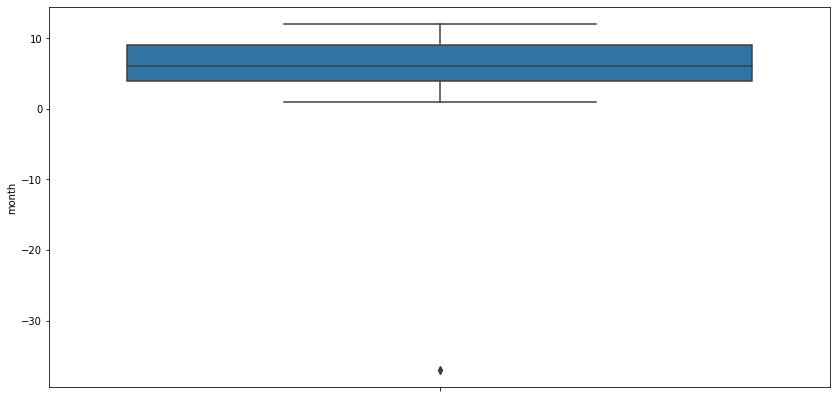

In [250]:
#detecting outliers
sns.boxplot(y='month',data=df)

In [251]:
#replacing outliers
for x in df.index:
  if df.loc[x,"month"]<1:
    df.loc[x,"month"]=None
  try:
    df.loc[x,"year"]=int(df.loc[x,"year"])
    
  except:
    df.loc[x,"year"]=None
  try:
    df.loc[x,"pressure"]=float(df.loc[x,"pressure"])
  except:
    df.loc[x,"pressure"]=None  

In [252]:
df.head()


,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,2013,NaN,1.0,0.0,4.0,-0.7,None,0.0,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,None,NaN,1.0,1.0,8.0,-1.1,1023.2,0.0,5.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,5.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,3.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [253]:

# filling (backfill methid) the data after removal of unwanted datas
df=df.fillna(method="bfill")

df.head(8)


,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,2013,3.0,1.0,0.0,4.0,-0.7,1023.2,0.0,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,2013,3.0,1.0,1.0,8.0,-1.1,1023.2,0.0,5.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,5.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,3.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,5,2013,3.0,1.0,6.0,5.0,-2.2,1025.6,0.0,3.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,6,2013,3.0,1.0,6.0,3.0,-2.6,1026.5,0.0,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,7,2013,3.0,1.0,7.0,3.0,-1.6,1027.4,0.0,3.8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [254]:
df.isnull().sum().sum()


0

In [255]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
df[['year','month','day','hour','PM2.5','temperature','pressure']]=scaling.fit_transform(df[['year','month','day','hour','PM2.5','temperature','pressure']])


In [256]:
df.head()

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0.0,0.181818,0.994725,0.996454,1.575680e-08,0.280977,0.997189,0.0,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0.0,0.181818,0.994725,0.996609,7.878400e-08,0.273997,0.997189,0.0,5.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.0,0.181818,0.994725,0.996763,6.302720e-08,0.273997,0.997234,0.0,5.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,0.0,0.181818,0.994725,0.996917,4.727040e-08,0.268761,0.997383,0.0,3.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,0.0,0.181818,0.994725,0.997071,0.000000e+00,0.258290,0.997488,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [257]:
df.mean().mean()


623.1908803802986

In [258]:
df.median().median()

0.0

In [259]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [260]:
df

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0.0,0.181818,0.994725,0.996454,1.575680e-08,0.280977,0.997189,0.0,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0.0,0.181818,0.994725,0.996609,7.878400e-08,0.273997,0.997189,0.0,5.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.0,0.181818,0.994725,0.996763,6.302720e-08,0.273997,0.997234,0.0,5.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,0.0,0.181818,0.994725,0.996917,4.727040e-08,0.268761,0.997383,0.0,3.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,0.0,0.181818,0.994725,0.997071,0.000000e+00,0.258290,0.997488,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31522,35022,1.0,0.090909,0.999297,0.997379,1.213274e-06,0.287958,0.996621,0.0,0.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31523,35032,1.0,0.090909,0.999297,0.998921,1.134490e-06,0.570681,0.995813,0.0,2.9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
31524,35035,1.0,0.090909,0.999297,0.999383,7.563264e-07,0.493892,0.995828,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
31525,35042,1.0,0.090909,0.999472,0.996763,9.454080e-08,0.443281,0.996112,0.0,0.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


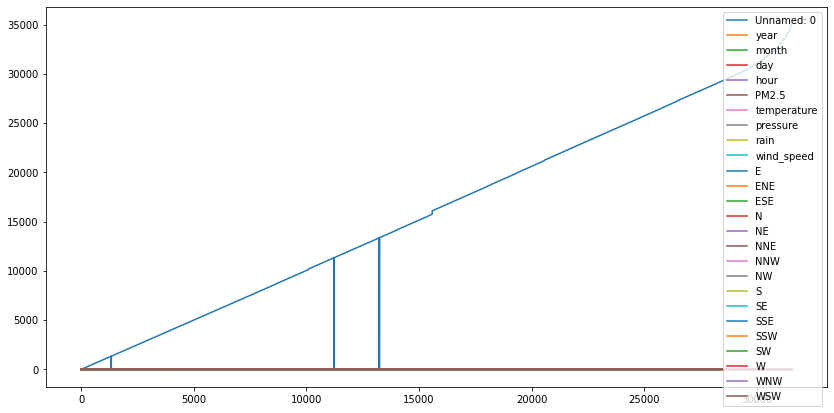

In [261]:
df.plot()
plt.show()

In [262]:
#correlation
df.corr()

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
Unnamed: 0,1.000000,0.968115,0.052659,-0.000978,-0.004892,-0.009105,-0.019036,0.035939,0.008706,0.093044,0.085704,0.035402,0.081917,-0.056979,-0.068052,-0.064027,0.001520,0.094103,0.009781,0.065973,0.025743,-0.034413,-0.053039,-0.033488,0.029225,-0.049408
year,0.968115,1.000000,-0.197649,-0.008614,-0.007270,-0.007743,-0.056375,0.033705,0.005065,0.128230,0.075122,0.021420,0.075169,-0.055427,-0.070745,-0.061817,0.005027,0.100654,0.013259,0.064118,0.026149,-0.023567,-0.042685,-0.034162,0.032093,-0.049127
month,0.052659,-0.197649,1.000000,0.007351,0.009089,-0.004171,0.150874,0.005224,0.014098,-0.145390,0.036058,0.052671,0.020438,-0.001142,0.016507,-0.002830,-0.012865,-0.032335,-0.014902,0.002043,-0.003580,-0.042082,-0.040032,0.005800,-0.012527,0.002418
day,-0.000978,-0.008614,0.007351,1.000000,0.000683,-0.001939,0.014932,0.000241,0.000179,-0.009257,0.004148,0.003577,0.003645,-0.002650,0.001182,-0.001402,-0.003875,-0.001798,0.001528,0.003046,0.001031,0.004492,0.007655,0.000946,-0.033231,0.000220
hour,-0.004892,-0.007270,0.009089,0.000683,1.000000,0.001019,0.036284,-0.005175,0.002571,0.020298,-0.009782,-0.019279,-0.000084,-0.002193,-0.025479,-0.010709,0.002428,-0.022177,0.012960,0.006484,0.011341,0.019484,0.028807,0.005689,0.004861,0.017856
PM2.5,-0.009105,-0.007743,-0.004171,-0.001939,0.001019,1.000000,-0.004341,-0.000333,0.007283,0.000797,-0.001580,-0.001987,-0.001267,-0.001441,-0.002281,0.020334,-0.001222,-0.001316,-0.001118,-0.001104,-0.000974,-0.001456,-0.001844,-0.001072,-0.001043,-0.001493
temperature,-0.019036,-0.056375,0.150874,0.014932,0.036284,-0.004341,1.000000,-0.209460,0.033580,0.038332,-0.013580,-0.085488,0.026112,-0.056430,-0.106409,-0.041861,-0.073604,-0.058993,0.077879,0.046946,0.062288,0.124988,0.127355,-0.001317,-0.013530,0.058140
pressure,0.035939,0.033705,0.005224,0.000241,-0.005175,-0.000333,-0.209460,1.000000,-0.015272,0.013079,0.002458,0.015496,-0.004045,0.014690,0.016889,-0.010768,0.019356,0.017232,-0.011768,-0.005836,-0.008741,-0.021043,-0.021962,-0.003765,0.003193,-0.009749
rain,0.008706,0.005065,0.014098,0.000179,0.002571,0.007283,0.033580,-0.015272,1.000000,0.021374,0.001716,0.008460,0.016444,0.000586,0.004997,0.012962,0.005111,-0.004654,-0.008863,-0.001168,-0.007589,-0.015212,-0.008099,0.006508,-0.005428,-0.011615
wind_speed,0.093044,0.128230,-0.145390,-0.009257,0.020298,0.000797,0.038332,0.013079,0.021374,1.000000,-0.119927,-0.111719,-0.063626,0.085379,-0.097940,-0.016976,0.167925,0.191067,-0.019704,-0.057932,-0.040984,0.026259,0.107729,-0.059985,0.056199,0.031591


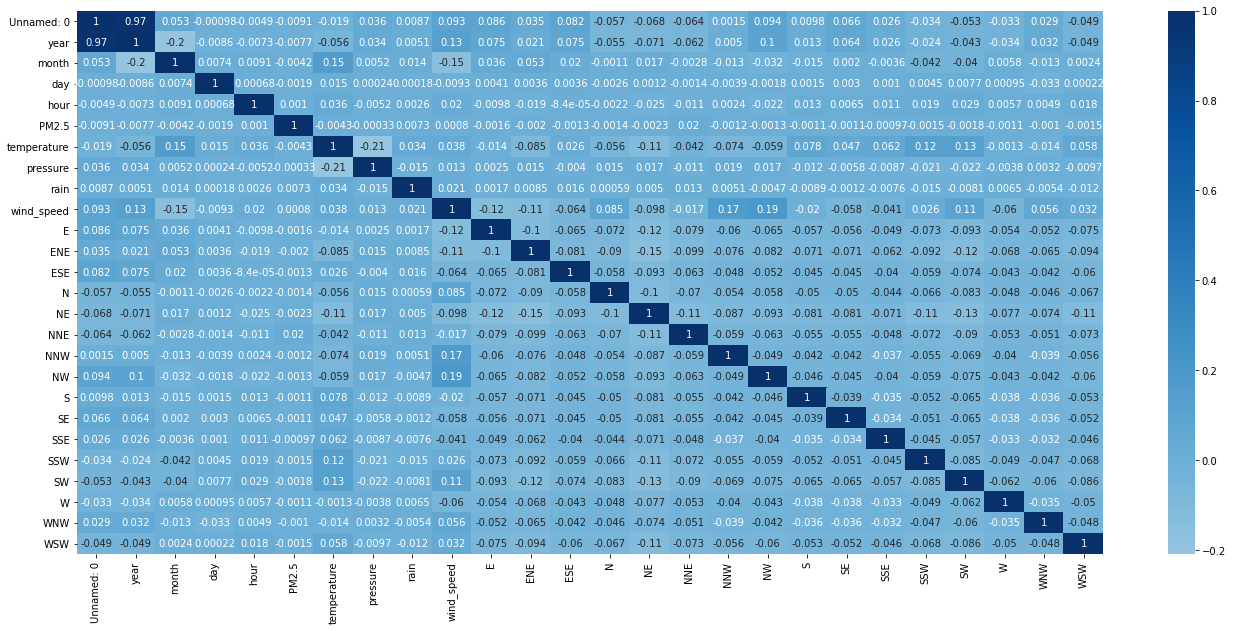

In [263]:
#heatmap
fig, ax = plt.subplots(figsize=(23,10))
sns.heatmap(df.corr(), center=0, cmap='Blues', annot=True)

In [264]:
df

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0.0,0.181818,0.994725,0.996454,1.575680e-08,0.280977,0.997189,0.0,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0.0,0.181818,0.994725,0.996609,7.878400e-08,0.273997,0.997189,0.0,5.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.0,0.181818,0.994725,0.996763,6.302720e-08,0.273997,0.997234,0.0,5.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,0.0,0.181818,0.994725,0.996917,4.727040e-08,0.268761,0.997383,0.0,3.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,0.0,0.181818,0.994725,0.997071,0.000000e+00,0.258290,0.997488,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31522,35022,1.0,0.090909,0.999297,0.997379,1.213274e-06,0.287958,0.996621,0.0,0.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31523,35032,1.0,0.090909,0.999297,0.998921,1.134490e-06,0.570681,0.995813,0.0,2.9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
31524,35035,1.0,0.090909,0.999297,0.999383,7.563264e-07,0.493892,0.995828,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
31525,35042,1.0,0.090909,0.999472,0.996763,9.454080e-08,0.443281,0.996112,0.0,0.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


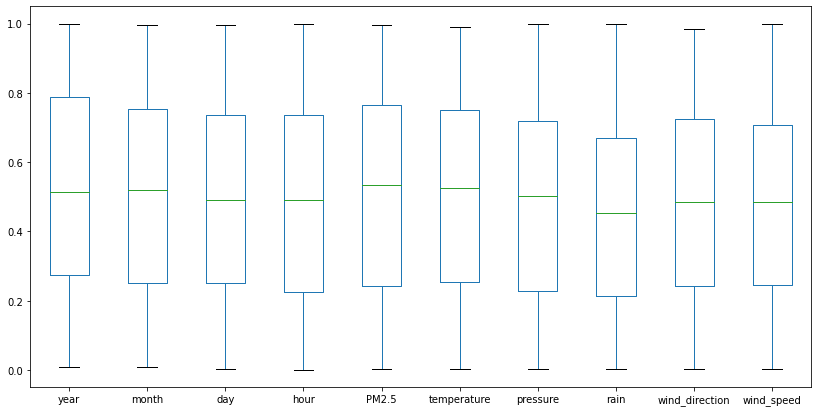

In [265]:
#boxplot
df = pd.DataFrame(np.random.rand(200,10), columns=["year", "month", "day","hour","PM2.5","temperature","pressure","rain","wind_direction","wind_speed"])
plt.rcParams["figure.figsize"] = (14,7)
df.plot.box();
#31527 rows × 11 columns